In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df_agebs = gpd.read_file("./agebs.geojson").to_crs("EPSG:6372")

In [3]:
df_industries = (
    pd.read_csv(
        "/Users/rodolfofigueroa/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/jobs/denue_2023_estimaciones.csv",
        usecols=["codigo_act", "num_empleos_esperados", "longitud", "latitud"],
    )
    .assign(geometry=lambda df: gpd.points_from_xy(df["longitud"], df["latitud"]))
    .drop(columns=["longitud", "latitud"])
)

df_industries = gpd.GeoDataFrame(
    df_industries,
    geometry="geometry",
    crs="EPSG:4326",
).to_crs("EPSG:6372")

df_industries = df_industries.sjoin(
    df_agebs[["geometry"]],
    how="inner",
    predicate="within",
).drop(columns=["index_right"])

In [15]:
sector_map = {
    22: "Energía eléctrica, agua y gas",
    31: "Manufactureras (alimentos, tabaco y textiles)",
    32: "",
}

wanted_codes = [
    "22",
    "31",
    "32",
    "33",
    "5622",
]
df_industries_filtered = df_industries[
    df_industries["codigo_act"]
    .astype(str)
    .apply(
        lambda x: any(x.startswith(code) for code in wanted_codes),
    )
].assign(
    sector=lambda df: df["codigo_act"].astype(str).str[:2].astype(int),
    subsector=lambda df: df["codigo_act"].astype(str).str[:3].astype(int),
)

In [19]:
df_industries_filtered["subsector"].value_counts().sort_index().reset_index().assign(
    sector=lambda df: df["subsector"].astype(str).str[:2].astype(int),
)

,subsector,count,sector
0,221,43,22
1,311,625,31
2,312,31,31
3,313,4,31
4,314,32,31
5,315,165,31
6,316,22,31
7,321,123,32
8,322,73,32
9,323,137,32


<Axes: >

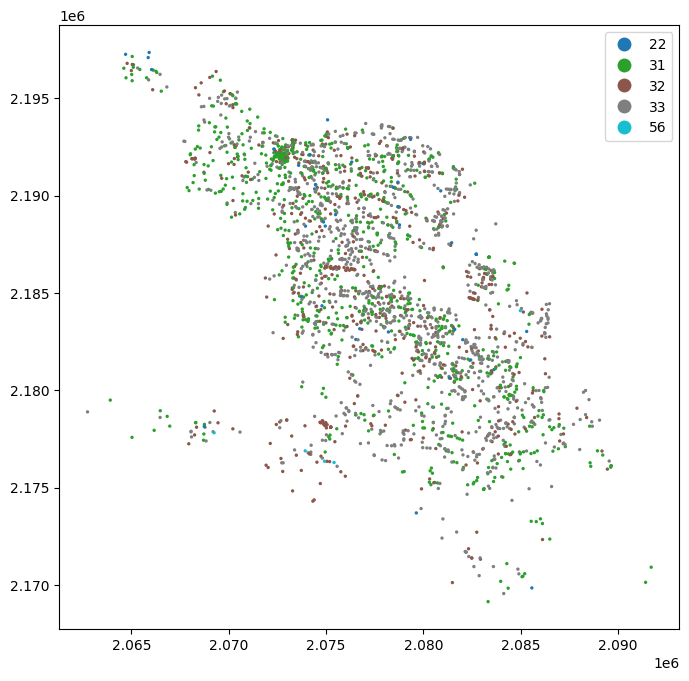

In [13]:
df_industries_filtered.plot(
    markersize=2,
    figsize=(8, 8),
    column="sector",
    legend=True,
    categorical=True,
)